C:\Users\PC\AppData\Local\Temp\ipykernel_25004\56785504.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_lateral = np.trapz(area_vals, x)


📦 Volume do sólido: 4.9348 unidades cúbicas
🧮 Área lateral da superfície: 14.4236 unidades quadradas
📘 Área sob a curva f(x): 2.0000 unidades quadradas


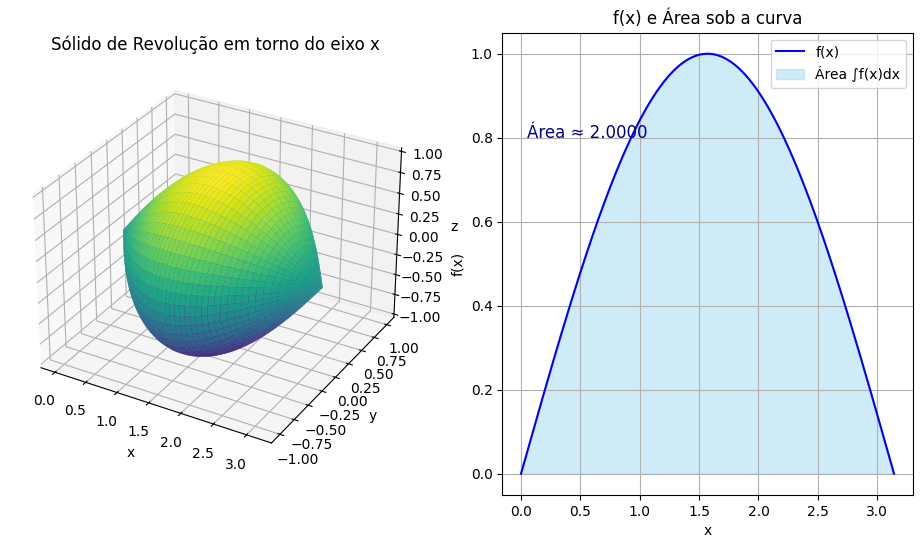

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import quad

# Função alternativa para cumtrapz se sua versão do SciPy for antiga
def cumtrapz_manual(y, x):
    cumint = np.zeros_like(y)
    for i in range(1, len(y)):
        cumint[i] = cumint[i-1] + np.trapz(y[i-1:i+1], x[i-1:i+1])
    return cumint

def plot_solid_and_primitives(f, x_range=(0, 4), n_points=1000, n_angles=100):
    a, b = x_range
    x = np.linspace(a, b, n_points)
    y = f(x)

    # Volume do sólido de revolução
    volume_integrand = lambda x: np.pi * f(x)**2
    volume, _ = quad(volume_integrand, a, b)

    # Derivada e área lateral
    dy_dx = np.gradient(y, x)
    area_vals = 2 * np.pi * y * np.sqrt(1 + dy_dx**2)
    area_lateral = np.trapz(area_vals, x)

    # Área sob a curva
    area_sob_curva, _ = quad(f, a, b)

    # ---------- GRÁFICO 3D ----------
    theta = np.linspace(0, 2 * np.pi, n_angles)
    X, T = np.meshgrid(x, theta)
    R = f(X)
    Y = R * np.cos(T)
    Z = R * np.sin(T)

    fig = plt.figure(figsize=(18, 6))

    # Subplot 1: Gráfico 3D do sólido de revolução
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax1.set_title('Sólido de Revolução em torno do eixo x')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')

    # Subplot 2: f(x) com área destacada
    ax2 = fig.add_subplot(132)
    ax2.plot(x, y, label='f(x)', color='blue')
    ax2.fill_between(x, 0, y, color='skyblue', alpha=0.4, label='Área ∫f(x)dx')
    ax2.set_title('f(x) e Área sob a curva')
    ax2.set_xlabel('x')
    ax2.set_ylabel('f(x)')
    ax2.legend()
    ax2.grid(True)
    ax2.text(0.05, max(y)*0.8, f"Área ≈ {area_sob_curva:.4f}", fontsize=12, color='darkblue')

    # Impressão dos valores
    print(f"📦 Volume do sólido: {volume:.4f} unidades cúbicas")
    print(f"🧮 Área lateral da superfície: {area_lateral:.4f} unidades quadradas")
    print(f"📘 Área sob a curva f(x): {area_sob_curva:.4f} unidades quadradas")

# Exemplo de uso:
f = lambda x: np.sin(x)
plot_solid_and_primitives(f, x_range=(0, np.pi))


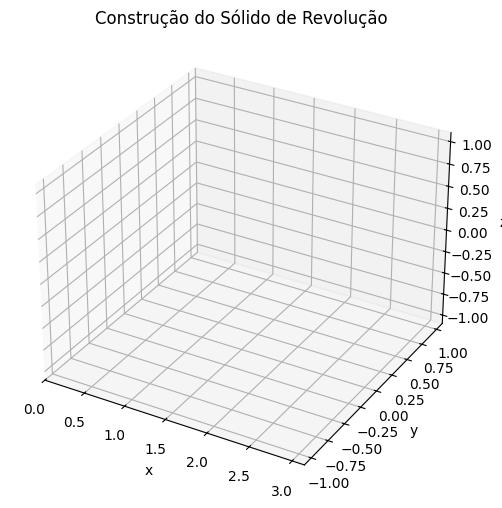

h:\anaconda3\envs\torch\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

def f(x):
    return np.sin(x)

def animate_build_revolution(f, x_range=(0, np.pi), n_points=200, n_theta=200, n_frames=60):
    x = np.linspace(*x_range, n_points)
    y = f(x)
    theta_vals = np.linspace(0, 2 * np.pi, n_theta)
    
    # Prepare full meshgrids
    x_grid, theta_grid = np.meshgrid(x, theta_vals)
    y_grid = f(x_grid)
    X_full = x_grid
    Y_full = y_grid * np.cos(theta_grid)
    Z_full = y_grid * np.sin(theta_grid)

    # Set up the figure and axis
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    max_y = np.max(y)
    ax.set_xlim(x_range[0], x_range[1])
    ax.set_ylim(-max_y * 1.1, max_y * 1.1)
    ax.set_zlim(-max_y * 1.1, max_y * 1.1)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title("Construção do Sólido de Revolução")

    # Initial surface (empty slice)
    surf = [ax.plot_surface(X_full[:, :1], Y_full[:, :1], Z_full[:, :1],
                            color='skyblue', alpha=0.8, edgecolor='gray')]

    # Animation update function
    def update(frame):
        # Remove previous surface
        surf[0].remove()
        # Determine how many theta slices to show
        idx = int((frame + 1) / n_frames * n_theta)
        # Plot the growing surface
        surf[0] = ax.plot_surface(X_full[:, :idx], Y_full[:, :idx], Z_full[:, :idx],
                                  color='skyblue', alpha=0.8, edgecolor='gray')
        return surf

    ani = animation.FuncAnimation(fig, update, frames=n_frames, interval=100, blit=False)
    return ani

# Executa a animação
ani = animate_build_revolution(f)
ani.save("revolucao_construcao.gif", writer="pillow")